In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
words = open('names.txt', 'r').read().split('\n')  

In [3]:
for w in words:
    print(w)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [4]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [5]:
sorted(b.items(), key = lambda kv:-kv[1])

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
N = torch.zeros((27, 27), dtype=torch.int32)


In [7]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [8]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1



In [9]:
N

tensor([[   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
         1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
          134,  535,  929],
        [6640,  556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
         2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,
          182, 2050,  435],
        [ 114,  321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
          103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,
            0,   83,    0],
        [  97,  815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
          116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,
            3,  104,    4],
        [ 516, 1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
           60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,
            0,  317,    1],
        [3983,  679,  121,  153,  384, 1271,   82,

(-0.5, 26.5, 26.5, -0.5)

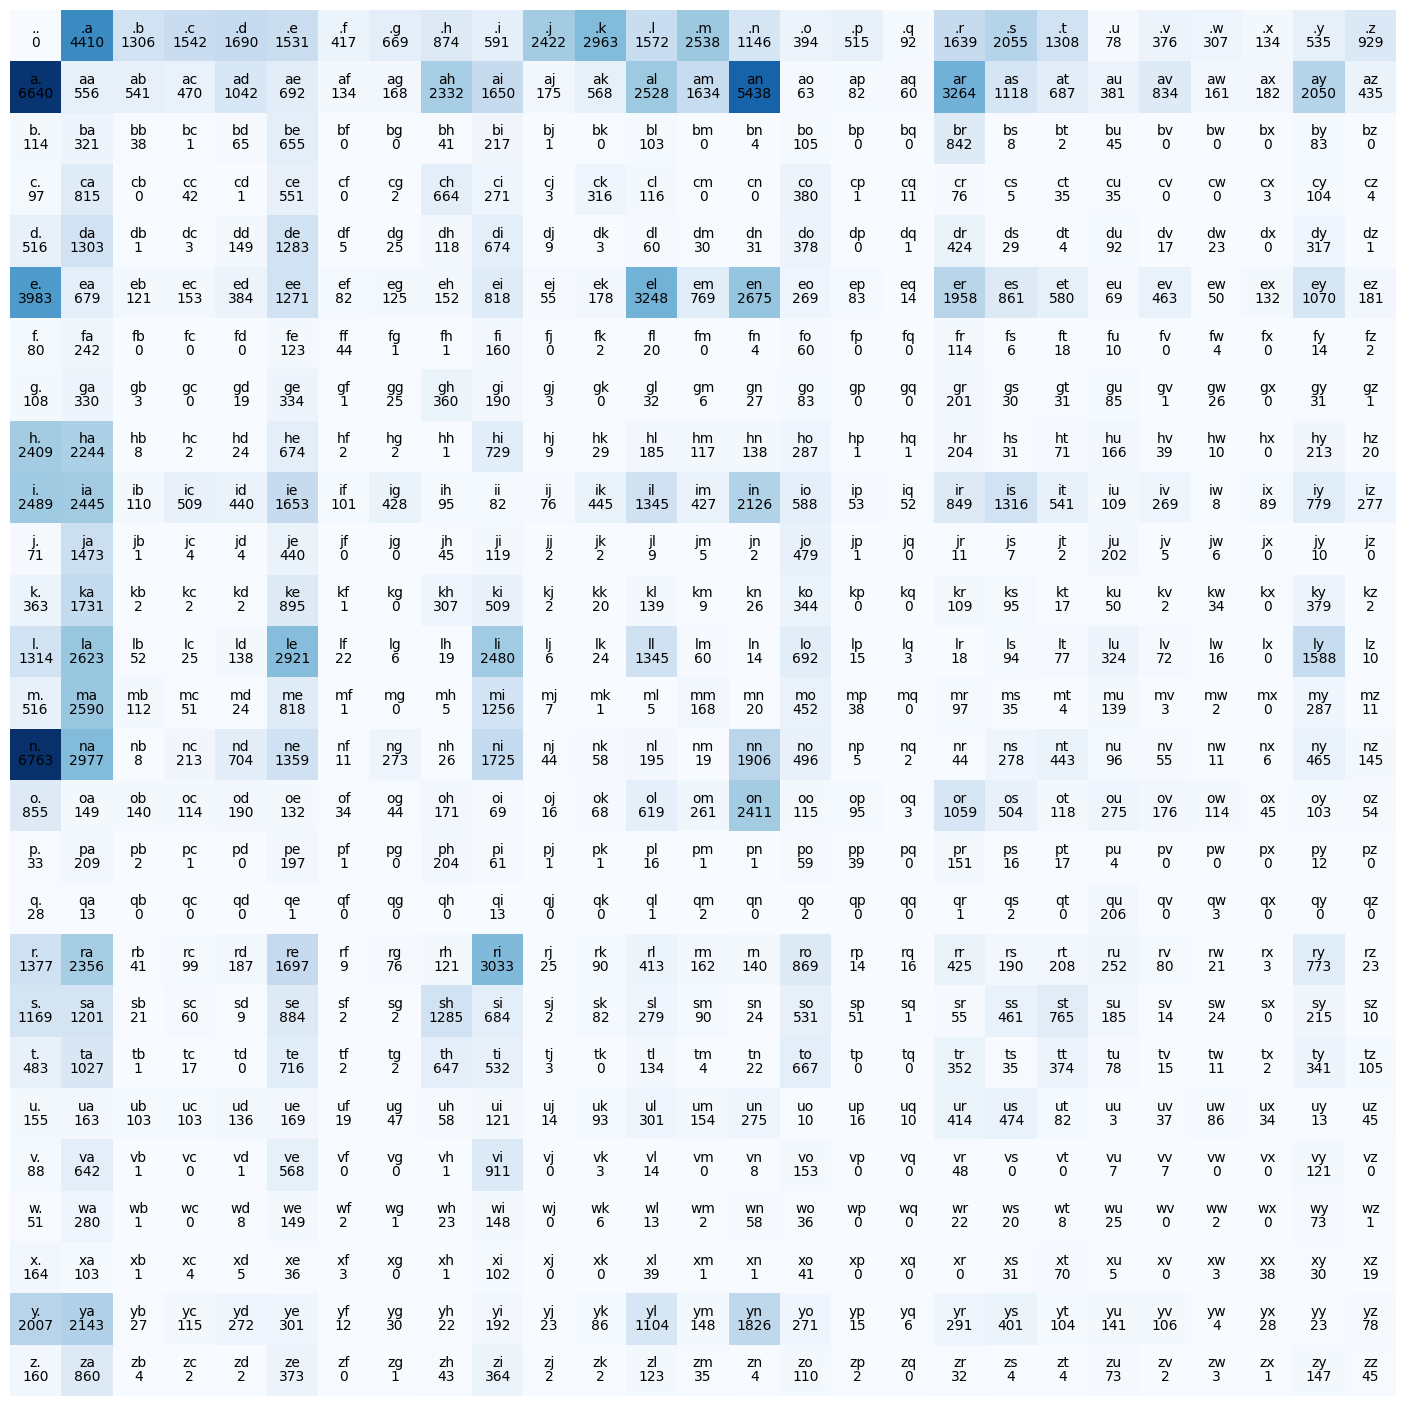

In [10]:
plt.figure(figsize=(18,18))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom')
        plt.text(j, i, N[i, j].item(), ha='center', va='top')
plt.axis('off')

In [11]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [12]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [31]:
g = torch.Generator().manual_seed(345)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'i'

In [33]:
g = torch.Generator().manual_seed(345)
p = torch.rand(3, generator=g)
p = p/p.sum()
p

tensor([0.8012, 0.0227, 0.1761])

In [35]:
torch.multinomial(p, num_samples=100, replacement=True, generator = g)

tensor([0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1,
        0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
        0, 2, 0, 2])

In [34]:
p.shape

torch.Size([3])

In [37]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [41]:
g = torch.Generator().manual_seed(345)

for i in range(20):

    out = []
    ix = 0
    while True:
        
        
        p = P[ix].float()
        p = p/p.sum()
        
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix==0:
            break

    print(''.join(out))

rels.
kanik.
acy.
allyannaeet.
eph.
zetopexintle.
zonntvacka.
n.
kela.
ayamen.
frilakrri.
cellulen.
ah.
miredvone.
ana.
mohelea.
enagydiiaulakavi.
lenn.
m.
anayiasoayn.


In [18]:
# goal is to maximise likelihood of data wrt model parameters
# equivalent to maximising log likelihood
# equivalent to minimising the negative log likelihood
# equivalent to minimising the average log likelihood

In [42]:

log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
       # print(f'{ch1}{ch2} : {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
559951.5625
2.4543561935424805


In [88]:
# create training set of bigrams

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [89]:
xs

tensor([ 0,  5, 13, 13,  1])

In [90]:
ys

tensor([ 5, 13, 13,  1,  0])

In [91]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [92]:
xenc.shape

torch.Size([5, 27])

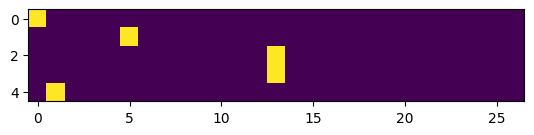

In [93]:
plt.imshow(xenc)

In [94]:
xenc.dtype

torch.float32

In [95]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-1.3789, -0.2583, -0.4079, -1.5836,  0.8667,  0.9924, -0.5300, -0.1077,
         -1.4927, -0.4907, -0.8258, -0.1801,  0.4723,  0.6622,  0.1523, -2.1675,
          0.2529,  1.2629, -0.5280,  0.1605, -1.5651,  0.7047, -0.0702, -1.6565,
         -0.6119,  1.3695, -0.8631],
        [-0.3309,  0.1297,  0.9992, -0.0431, -0.0771, -0.3641,  1.3071,  1.4846,
          0.5319, -0.6499, -0.6451, -1.1686, -2.1717, -0.5909,  0.5801,  0.7464,
         -1.3291,  1.5098, -1.2397, -1.2237, -0.2877,  0.2818, -0.3680,  1.1752,
         -1.0595,  2.8027,  0.3022],
        [ 0.5907, -1.2499,  0.8024, -1.4029, -0.1072, -1.8545,  2.9280,  0.7729,
          0.6875,  0.3897, -1.7290, -0.8467,  0.0702, -0.8851, -0.3180, -1.0560,
          0.9515,  1.0722, -0.7877, -2.0866,  0.2541,  0.6246, -1.2152, -0.9579,
          0.6999, -0.6564,  0.7127],
        [ 0.5907, -1.2499,  0.8024, -1.4029, -0.1072, -1.8545,  2.9280,  0.7729,
          0.6875,  0.3897, -1.7290, -0.8467,  0.0702, -0.8851, -0.3180, -1.0560

In [96]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs


tensor([[0.0083, 0.0255, 0.0220, 0.0068, 0.0787, 0.0892, 0.0195, 0.0297, 0.0074,
         0.0203, 0.0145, 0.0276, 0.0531, 0.0641, 0.0385, 0.0038, 0.0426, 0.1170,
         0.0195, 0.0388, 0.0069, 0.0669, 0.0308, 0.0063, 0.0179, 0.1301, 0.0140],
        [0.0137, 0.0217, 0.0518, 0.0183, 0.0177, 0.0132, 0.0705, 0.0841, 0.0325,
         0.0100, 0.0100, 0.0059, 0.0022, 0.0106, 0.0341, 0.0402, 0.0050, 0.0863,
         0.0055, 0.0056, 0.0143, 0.0253, 0.0132, 0.0617, 0.0066, 0.3144, 0.0258],
        [0.0379, 0.0060, 0.0469, 0.0052, 0.0189, 0.0033, 0.3926, 0.0455, 0.0418,
         0.0310, 0.0037, 0.0090, 0.0225, 0.0087, 0.0153, 0.0073, 0.0544, 0.0614,
         0.0096, 0.0026, 0.0271, 0.0392, 0.0062, 0.0081, 0.0423, 0.0109, 0.0428],
        [0.0379, 0.0060, 0.0469, 0.0052, 0.0189, 0.0033, 0.3926, 0.0455, 0.0418,
         0.0310, 0.0037, 0.0090, 0.0225, 0.0087, 0.0153, 0.0073, 0.0544, 0.0614,
         0.0096, 0.0026, 0.0271, 0.0392, 0.0062, 0.0081, 0.0423, 0.0109, 0.0428],
        [0.0178, 0.0109,

In [97]:
probs[0]

tensor([0.0083, 0.0255, 0.0220, 0.0068, 0.0787, 0.0892, 0.0195, 0.0297, 0.0074,
        0.0203, 0.0145, 0.0276, 0.0531, 0.0641, 0.0385, 0.0038, 0.0426, 0.1170,
        0.0195, 0.0388, 0.0069, 0.0669, 0.0308, 0.0063, 0.0179, 0.1301, 0.0140])

In [98]:
probs[0].shape

torch.Size([27])

In [99]:
probs[0].sum()

tensor(1.0000)

In [100]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0083, 0.0255, 0.0220, 0.0068, 0.0787, 0.0892, 0.0195, 0.0297, 0.0074,
        0.0203, 0.0145, 0.0276, 0.0531, 0.0641, 0.0385, 0.0038, 0.0426, 0.1170,
        0.0195, 0.0388, 0.0069, 0.0669, 0.0308, 0.0063, 0.0179, 0.1301, 0.0140])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.08924129605293274
log likelihood: -2.4164113998413086
negative log likelihood: 2.4164113998413086
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0137, 0.0217, 0.0518, 0.0183, 0.0177, 0.0132, 0.0705, 0.0841, 0.0325,
        0.0100, 0.0100, 0.0059, 0.0022, 0.0106, 0.0341, 0.0402, 0.0050, 0.0863,
        0.0055, 0.0056, 0.0143, 0.0253, 0.0132, 0.0617, 0.0066, 0.3144, 0.0258])
label (actual next character): 13
probability assigned by the net to the the correct character: 

In [101]:
xs

tensor([ 0,  5, 13, 13,  1])

In [102]:
ys

tensor([ 5, 13, 13,  1,  0])

In [103]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(345)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [104]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [105]:
print(loss.item())

3.778404951095581


In [106]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [107]:
W.data += -0.1 * W.grad

In [108]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(345)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [155]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.4808521270751953
2.480849504470825
2.480847120285034
2.480844259262085
2.480841636657715
2.4808387756347656
2.4808363914489746
2.4808337688446045
2.4808313846588135
2.4808287620544434
2.480825901031494
2.4808237552642822
2.480821371078491
2.480818748474121
2.48081636428833
2.48081374168396
2.480811595916748
2.480809211730957
2.480806589126587
2.480804204940796
2.480802059173584
2.480799674987793
2.480797290802002
2.480795383453369
2.480792760848999
2.480790376663208
2.480788230895996
2.480785846710205
2.4807839393615723
2.480781316757202
2.4807796478271484
2.4807770252227783
2.4807748794555664
2.4807729721069336
2.4807708263397217
2.4807684421539307
2.480766534805298
2.480764389038086
2.480762481689453
2.480760335922241
2.4807581901550293
2.4807562828063965
2.4807543754577637
2.4807519912719727
2.480750322341919
2.480748176574707
2.4807465076446533
2.4807443618774414
2.4807424545288086
2.480740547180176
2.480738401412964
2.48073673248291
2.4807350635528564
2.4807329177856445
2.480731

In [156]:
g = torch.Generator().manual_seed(345)

for i in range(20):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

rels.
kanik.
acy.
alqumanaeet.
eph.
zetopuxintle.
zonntvacka.
n.
kela.
ayamen.
frilakrri.
cellulen.
ah.
miredvone.
ana.
mohelea.
enagydiiaulakavi.
lenn.
m.
anayiasoayn.
